### Episode 1 
目标函数：$f(x,y)=3*cos(xy)+x+y$

In [1]:
using Plots
pyplot(leg=false, ticks=nothing)

Plots.PyPlotBackend()

In [2]:
function fitFuncCalc(vec)
    x, y = vec
    return x*cos(x*y)+x+y
end

fitFuncCalc (generic function with 1 method)

In [3]:
`Variation function, x->v`
function geneVariation(x, F)
    sz = size(x)
    v = zeros(sz)
    for i in 1:sz[1]
        r1 = rand(setdiff(1:sz[1], i))             # 随机选中一个不一样的index
        r2 = rand(setdiff(1:sz[1], [i, r1]))
        r3 = rand(setdiff(1:sz[1], [i, r1, r2]))
        v[i,:] = x[r1,:] + F*(x[r2,:] - x[r3,:])
    end
    return v
end

┌ Warning: special characters "#{}()[]<>|&*?~;" should now be quoted in commands
│   caller = #shell_parse#353(::String, ::typeof(Base.shell_parse), ::String, ::Bool) at shell.jl:100
└ @ Base ./shell.jl:100


geneVariation (generic function with 1 method)

In [4]:
`cross function,writer may wrong`
function geneCross(x, v, CR)
    `从x和v中选择出u`
    sz = size(x)
    r = rand(1:sz[2])
    u = zeros(sz)
    for i = 1:sz[2]
        cr = rand()
        if(cr<=CR || i==r)      # 随机选择其中的一维进行变化，其他的按概率变化
            u[:, i] = v[:, i]
        else
            u[:, i] = x[:, i]
        end
    end
    return u
end

geneCross (generic function with 1 method)

In [5]:
`deal with bound`
function dealBound!(u, Xs, Xx)
    for i in 1:size(u)[1]
        for j in 1:size(u)[2]
            u[i, j] = u[i, j]>Xs ? Xs : u[i, j]
            u[i, j] = u[i, j]<Xx ? Xx : u[i, j]
        end
    end
end

dealBound! (generic function with 1 method)

In [6]:
`select if new better`
function generateNew!(x, u)
    sz = size(u)
    obj1 = zeros(sz[1])
    for i in 1:sz[1]
        obj1[i] = fitFuncCalc(x[i, :])
        obj2 = fitFuncCalc(u[i, :])
        if obj2 < obj1[i]
            x[i, :] = u[i,:]
        end
    end
    minValue, minIdx = findmin(obj1)
    return minValue
end

generateNew! (generic function with 1 method)

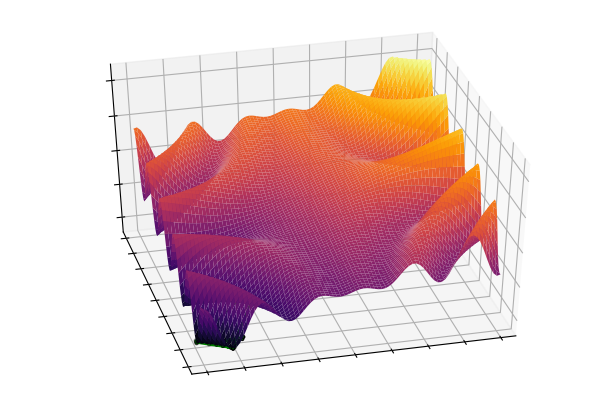

[-4.0, -3.158741286347746]


┌ Info: Saved animation to 
│   fn = /home/kuro/julia/Tutorial_julia/paper1/tmp.gif
└ @ Plots /home/kuro/.julia/packages/Plots/Iuc9S/src/animation.jl:95


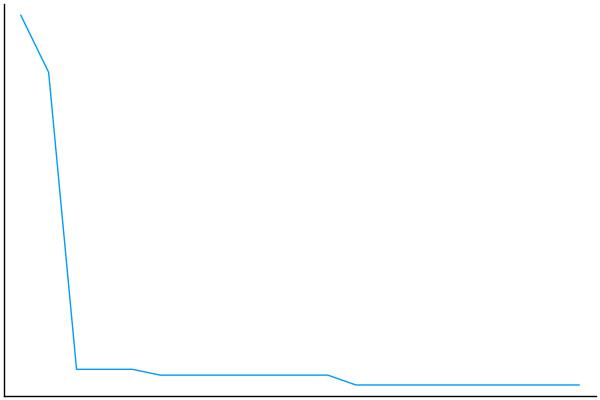

In [11]:
NP, D, G, CR, F, Xs, Xx = 20, 2, 20, 0.1, 0.5, 4, -4
x0 = Xx:0.1:Xs
y0 = Xx:0.1:Xs
fxy(x, y) = fitFuncCalc((x,y))

x = rand(NP, D) .*(Xs-Xx) .+ Xx    # 初始化
trace = []
@gif for gen in 1:G*30
    global x
    if(gen%30==0)
        # update the value
        v = geneVariation(x, F)
        u = geneCross(x, v, CR)
        dealBound!(u, Xs, Xx)
        append!(trace, generateNew!(x, u))
    end
    point_z = zeros(size(x)[1])
    for i in 1:size(x)[1]
        point_z[i] = fitFuncCalc(x[i, :])
    end
    point_x, point_y = x[:, 1], x[:, 2]
    # plot
    p = plot(x0, y0, fxy, st = [:surface])
    plot!(p, camera=(15*cos(0.1*gen), 40))
    plot!(point_x, point_y, point_z, marker = 2, color=[:green])
end
# final answer
obj = []
for i in 1:size(x)[1]
    append!(obj, fitFuncCalc(x[i, :]))
end
minValue, minIdx = findmin(obj)
append!(trace, minValue)


println(x[minIdx, :])
plot(trace)